In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')
from sklearn import linear_model
plt.rcParams["figure.figsize"] = (10,10)
import math
import seaborn as sns


In [2]:
data = pd.read_csv('look.txt', sep=' ')

In [33]:
data.head()

rs2192160 rs2822441 rs2822475  \
1381 21 Adygei Russia-Caucasus EUROPE 955 F         A         C         T   
                                          F         A         T         T   
1382 21 Adygei Russia-Caucasus EUROPE 956 F         A         T         C   
                                          F         A         T         T   
1385 21 Adygei Russia-Caucasus EUROPE 959 M         A         T         C   

                                            rs434396 rs2822510 rs417214  \
1381 21 Adygei Russia-Caucasus EUROPE 955 F        A         T        T   
                                          F        C         T        G   
1382 21 Adygei Russia-Caucasus EUROPE 956 F        A         T        T   
                                          F        C         T        G   
1385 21 Adygei Russia-Caucasus EUROPE 959 M        A         T        T   

                                            rs2822518 rs2822545 rs2822554  \
1381 21 Adygei Russia-Caucasus EUROPE 955 F         C         T         C   
                                          F         C         T         C   
1382 21 Adygei Russia-Caucasus EUROPE 956 F         C         T         C   
                                          F         C         T         C   
1385 21 Adygei Russia-Caucasus EUROPE 959 M         C         T         C   

                                            rs1297119  ... rs2838481  \
1381 21 Adygei Russia-Caucasus EUROPE 955 F         A  ...         G   
                                          F         G  ...         G   
1382 21 Adygei Russia-Caucasus EUROPE 956 F         G  ...         G   
                                          F         G  ...         G   
1385 21 Adygei Russia-Caucasus EUROPE 959 M         G  ...         C   

                                            rs2838485 rs2243348 rs2838488  \
1381 21 Adygei Russia-Caucasus EUROPE 955 F         G         C         C   
                                          F         G         C         C   
1382 21 Adygei Russia-Caucasus EUROPE 956 F         G         C         C   
                                          F         G         C         C   
1385 21 Adygei Russia-Caucasus EUROPE 959 M         A         T         G   

                                            rs2020943 rs1858665 rs2242954  \
1381 21 Adygei Russia-Caucasus EUROPE 955 F         C         C         C   
                                          F         C         C         C   
1382 21 Adygei Russia-Caucasus EUROPE 956 F         C         C         C   
                                          F         C         C         C   
1385 21 Adygei Russia-Caucasus EUROPE 959 M         C         T         G   

                                            rs2071135 rs2838494 rs2838503  
1381 21 Adygei Russia-Caucasus EUROPE 955 F         G         G         A  
                                          F         G         G         A  
1382 21 Adygei Russia-Caucasus EUROPE 956 F         G         G         A  
                                          F         G         G         A  
1385 21 Adygei Russia-Caucasus EUROPE 959 M         A         A         G  

[5 rows x 1272 columns]

In [35]:
data.shape

(2214, 1272)

# Coverting data to binary

In [4]:
from sklearn import preprocessing
import pandas as pd

In [5]:
le = preprocessing.LabelEncoder()

from sklearn.preprocessing import Binarizer
scaler = preprocessing.MinMaxScaler()

In [6]:
data_conv = data.T.apply(le.fit_transform).T
data_fin = pd.DataFrame(scaler.fit_transform(data_conv), columns=data_conv.columns, index = data_conv.index)

In [7]:
df = data_fin
df_maf_filtered = df.T[(df.mean() > .08)& (df.mean() < .92) ].T

In [8]:
print('shape dataframe : {} \nshape dataframe filtered maf>.08: {}'.format(df.shape[1], df_maf_filtered.shape[1])  )

shape dataframe : 1272 
shape dataframe filtered maf>.08: 1138


# Do different methods for data compression 

In [20]:
from sklearn import manifold
from sklearn import decomposition

In [120]:
deco = [decomposition.DictionaryLearning(n_components=2), 
       decomposition.FactorAnalysis(n_components=2),
       decomposition.FastICA(n_components=2),
       decomposition.IncrementalPCA(n_components=2),
       decomposition.KernelPCA(n_components=2),
       decomposition.LatentDirichletAllocation(n_components=2),
       decomposition.MiniBatchDictionaryLearning(n_components=2),
       decomposition.SparsePCA(n_components=2),
       decomposition.TruncatedSVD(n_components=2),
       decomposition.MiniBatchSparsePCA(n_components=2),
       decomposition.NMF(n_components=2),
       decomposition.PCA(n_components=2)]

In [121]:
mani = [
    manifold.Isomap(n_components=2),
    manifold.LocallyLinearEmbedding(n_components=2),
    manifold.MDS(n_components=2),
    manifold.SpectralEmbedding(n_components=2),  
]

In [114]:
compression_list = deco+mani

# get X, Y for ML 

In [9]:
np.array(df_maf_filtered.index.values)

array([(1381, 21, 'Adygei', 'Russia-Caucasus', 'EUROPE', 955, 'F'),
       (1381, 21, 'Adygei', 'Russia-Caucasus', 'EUROPE', 955, 'F'),
       (1382, 21, 'Adygei', 'Russia-Caucasus', 'EUROPE', 956, 'F'), ...,
       (943, 465, 'Yoruba', 'Nigeria', 'AFRICA', 104, 'M'),
       (944, 465, 'Yoruba', 'Nigeria', 'AFRICA', 105, 'M'),
       (944, 465, 'Yoruba', 'Nigeria', 'AFRICA', 105, 'M')], dtype=object)

In [10]:
indices = np.array([np.array(x) for x in df_maf_filtered.index.values])
country_le = preprocessing.LabelEncoder()

In [11]:
Y = indices[:, 4]
Yt = country_le.fit_transform(Y)

In [12]:
X = df_maf_filtered.values

In [13]:
print(X.shape, Y.shape)

(2214, 1138) (2214,)


# test elastic net and lightGBM

In [195]:
### test for elasticnet

In [23]:
#from metriclearning import *
from sklearn.cluster import MiniBatchKMeans as MBKM
from sklearn.linear_model import  ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, cross_validate
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [229]:
%%time
enclf = []
gbdclf = []

for redu in [decomposition.PCA(n_components=2),decomposition.NMF(n_components=2),decomposition.SparsePCA(n_components=2)]:
    #elasticnetclf = Pipeline([('scaler',redu), ('classifier',ElasticNet())])
    lightgbmclf = Pipeline([('scaler',redu),('classifier',LGBMClassifier())]) #

    #enclf.append(cross_val_score(elasticnetclf,X,Yt,cv=2,scoring = 'balanced_accuracy',  n_jobs= -1))
    gbdclf.append(cross_val_score(lightgbmclf,X,Yt,cv=2,scoring = 'balanced_accuracy',  n_jobs= -1))


## add case for tSNE 
X_tsne = manifold.TSNE(n_components=2).fit_transform(X)
#enclf.append(cross_val_score(elasticnetclf,X_tsne,Yt,cv=2,scoring = 'balanced_accuracy', n_jobs= -1))
gbdclf.append(cross_val_score(lightgbmclf,X_tsne,Yt,cv=2,scoring = 'balanced_accuracy',  n_jobs= -1))




CPU times: user 28.3 s, sys: 121 ms, total: 28.4 s
Wall time: 1h 28min 54s


In [223]:
enclf = np.array(enclf)
gbdclf = np.array(gbdclf)

In [226]:
pd.DataFrame([gbdclf.mean(axis=1),gbdclf.std(axis=1)], 
             columns=['PCA', 'NMF', "sparcePCA", 'tSNE'], 
             index=['Mean', 'STD'] )


,PCA,NMF,sparcePCA,tSNE
Mean,0.393347,0.306114,0.301296,0.590532
STD,0.009013,0.008585,0.000824,0.012331


In [225]:
enclf

array([], dtype=float64)

In [ ]:
sns.scatterplot()

# plot dataset

In [14]:
from matplotlib.colors import ListedColormap



In [16]:
#[pal[country_le.inverse_transform([4])[0]] for val in range(7)]


In [17]:
pal = {"EUROPE":"blue", 'AFRICA':"goldenrod", 'EAST_ASIA':"mediumorchid", 'MIDDLE_EAST':"olivedrab", 'CENTRAL_SOUTH_ASIA': 'violet', 'AMERICA':'salmon' , 'OCEANIA':'aquamarine'}

In [24]:
def make_plot(method):
    choppeddf = df_maf_filtered.sample(frac=0.999)
    indices = np.array([np.array(x) for x in choppeddf.index.values])
    country_le = preprocessing.LabelEncoder()
    Y = indices[:, 4]
    Yt = country_le.fit_transform(Y)
    
    input_val = method.fit_transform(choppeddf.values)
    output_val = Yt
    clf = LGBMClassifier()
    #clf = ElasticNet()
    #clf = MBKM(n_clusters=7)
    clf.fit(input_val, Yt)
    
    datframe = pd.DataFrame(input_val, columns=['val1', 'val2'], index=indices)
    datframe['continent'] = Y
    datframe['region']= indices[:,3]
    
    
    ranges = list(zip(np.array(datframe.min().values), np.array(datframe.max().values)))
    xranges = np.linspace(ranges[0][0], ranges[0][1], 100)
    yranges = np.linspace(ranges[1][0], ranges[1][1], 100)
    xx, yy = np.meshgrid(xranges,yranges)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.contourf(xx, yy, Z, alpha=.6, cmap= 'Set1') #cmap =ListedColormap([pal[country_le.inverse_transform([val])[0]] for val in range(7)])
    sns.scatterplot(data = datframe, hue = 'continent', x= 'val1', y= 'val2', ax = ax, palette = pal)
    sns.despine()

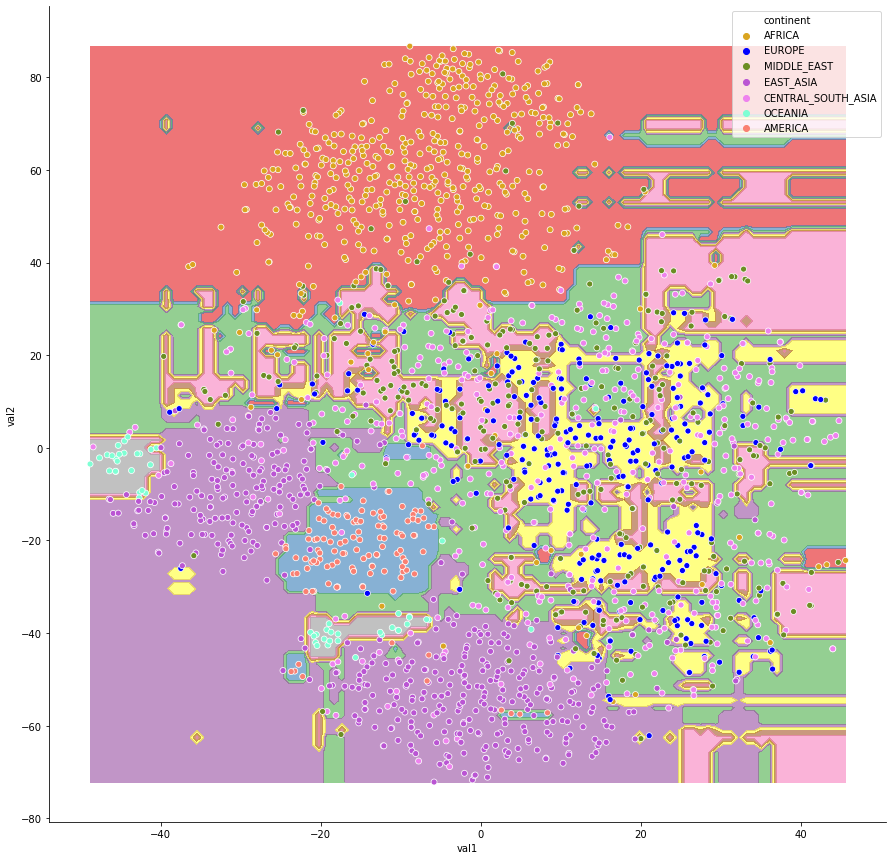

In [25]:
make_plot(manifold.TSNE(n_components=2))

In [335]:
deco = [decomposition.DictionaryLearning(n_components=2), 
       decomposition.FactorAnalysis(n_components=2),
       decomposition.FastICA(n_components=2),
       decomposition.IncrementalPCA(n_components=2),
       decomposition.KernelPCA(n_components=2),
       decomposition.LatentDirichletAllocation(n_components=2),
       decomposition.MiniBatchDictionaryLearning(n_components=2),
       decomposition.SparsePCA(n_components=2),
       decomposition.TruncatedSVD(n_components=2),
       decomposition.MiniBatchSparsePCA(n_components=2),
       decomposition.NMF(n_components=2),
       decomposition.PCA(n_components=2)]

{}

In [ ]:
pal = dict("EUROPE"="lightskyblue", 'AFRICA'="goldenrod", 'EAST_ASIA'="mediumorchid", 'MIDDLE_EAST'="olivedrab", 'CENTRAL_SOUTH_ASIA'= 'violet', 'AMERICA'='salmon' , 'OCEANIA'= 'aquamarine')

In [26]:
import itertools 

In [31]:
a = itertools.product([np.linspace(0,1,10), np.linspace(10,20,10)])

In [32]:
a

In [283]:
c2.shape

(50, 50)